In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
data <- read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod", skip = 19, col_names=FALSE) 
colnames(data) <- c("age", "sex", "chest_pain_type", "resting_blood_pres", "cholesteral", "fasting_blood_sugar < 120", "resting_ecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "number_of_vessels_colored", "thal", "healthy_or_sick", "sickness_classifier")








── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)



In [4]:
data

age,sex,chest_pain_type,resting_blood_pres,cholesteral,fasting_blood_sugar < 120,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,healthy_or_sick,sickness_classifier
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
63,male,angina,145,233,true,hyp,150,fal,2.3,down,0.0,fix,buff,H
67,male,asympt,160,286,fal,hyp,108,true,1.5,flat,3.0,norm,sick,S2
67,male,asympt,120,229,fal,hyp,129,true,2.6,flat,2.0,rev,sick,S1
37,male,notang,130,250,fal,norm,187,fal,3.5,down,0.0,norm,buff,H
41,fem,abnang,130,204,fal,hyp,172,fal,1.4,up,0.0,norm,buff,H
56,male,abnang,120,236,fal,norm,178,fal,0.8,up,0.0,norm,buff,H
62,fem,asympt,140,268,fal,hyp,160,fal,3.6,down,2.0,norm,sick,S3
57,fem,asympt,120,354,fal,norm,163,true,0.6,up,0.0,norm,buff,H
63,male,asympt,130,254,fal,hyp,147,fal,1.4,flat,1.0,rev,sick,S2


In [5]:
data_selected <- data |>
    select("age", "resting_blood_pres", "cholesteral", "max_heart_rate", "oldpeak", "number_of_vessels_colored", "healthy_or_sick", "sickness_classifier")

data_selected





age,resting_blood_pres,cholesteral,max_heart_rate,oldpeak,number_of_vessels_colored,healthy_or_sick,sickness_classifier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
63,145,233,150,2.3,0.0,buff,H
67,160,286,108,1.5,3.0,sick,S2
67,120,229,129,2.6,2.0,sick,S1
37,130,250,187,3.5,0.0,buff,H
41,130,204,172,1.4,0.0,buff,H
56,120,236,178,0.8,0.0,buff,H
62,140,268,160,3.6,2.0,sick,S3
57,120,354,163,0.6,0.0,buff,H
63,130,254,147,1.4,1.0,sick,S2


In [6]:
data_select <- select(data,oldpeak,healthy_or_sick)
data_select

oldpeak,healthy_or_sick
<dbl>,<chr>
2.3,buff
1.5,sick
2.6,sick
3.5,buff
1.4,buff
0.8,buff
3.6,sick
0.6,buff
1.4,sick


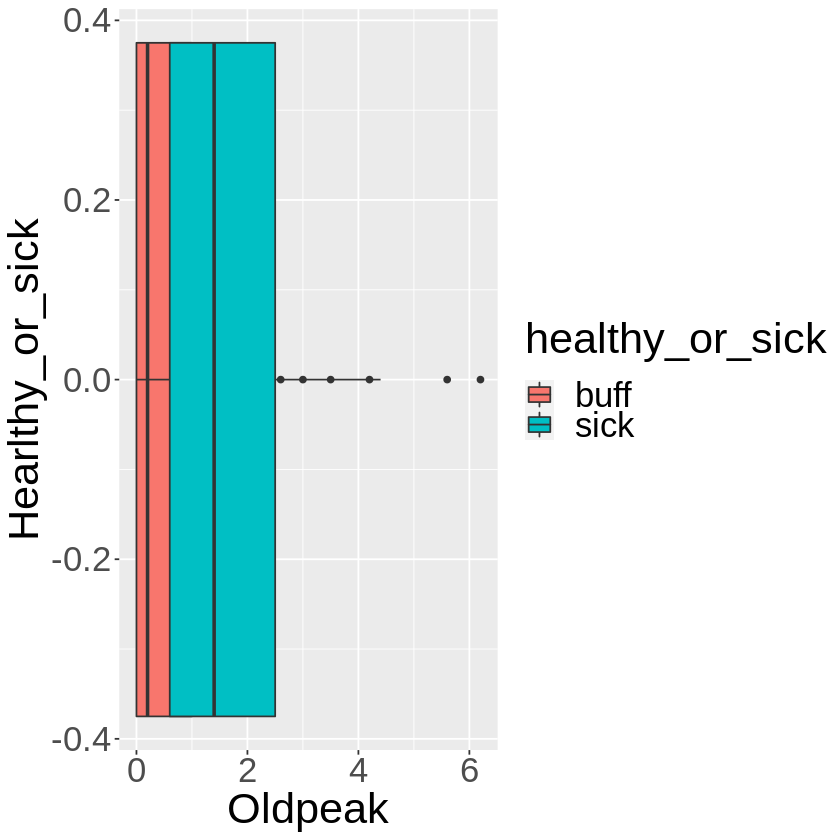

In [7]:
oldpeak_bloxplot <- ggplot(data,aes(x= oldpeak, fill = healthy_or_sick)) +
   geom_boxplot(position="identity")+
   labs(x= "Oldpeak",y="Hearlthy_or_sick")+
   theme(text=element_text(size=26))
oldpeak_bloxplot